# Doubling

In [3]:
import numpy as np
import ducc0
lmax = 5
ntheta = (ducc0.fft.good_size(lmax + 2) + 3) // 4 * 4
nphi = ducc0.fft.good_size(lmax + 1)*2
print(ntheta, nphi)
synth1D = np.arange((ntheta * nphi))
doubling1D_py = np.zeros((2 * ntheta-2, nphi))
print(doubling1D_py.flatten().shape)
synth1D_py = np.copy(synth1D.reshape(ntheta, nphi))
print(synth1D_py.shape, doubling1D_py[:ntheta, :].shape)

nphihalf = nphi//2
doubling1D_py[:ntheta, :] = synth1D_py
doubling1D_py[ntheta:, :nphihalf] = doubling1D_py[ntheta-2:0:-1, nphihalf:]
doubling1D_py[ntheta:, nphihalf:] = doubling1D_py[ntheta-2:0:-1, :nphihalf]

# doubling1D_py

8 12
(168,)
(8, 12) (8, 12)


8 12 14


array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       [36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.],
       [48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.],
       [60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71.],
       [72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.],
       [84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.],
       [78., 79., 80., 81., 82., 83., 72., 73., 74., 75., 76., 77.],
       [66., 67., 68., 69., 70., 71., 60., 61., 62., 63., 64., 65.],
       [54., 55., 56., 57., 58., 59., 48., 49., 50., 51., 52., 53.],
       [42., 43., 44., 45., 46., 47., 36., 37., 38., 39., 40., 41.],
       [30., 31., 32., 33., 34., 35., 24., 25., 26., 27., 28., 29.],
       [18., 19., 20., 21., 22., 23., 12., 13., 14., 15., 16., 17.]])

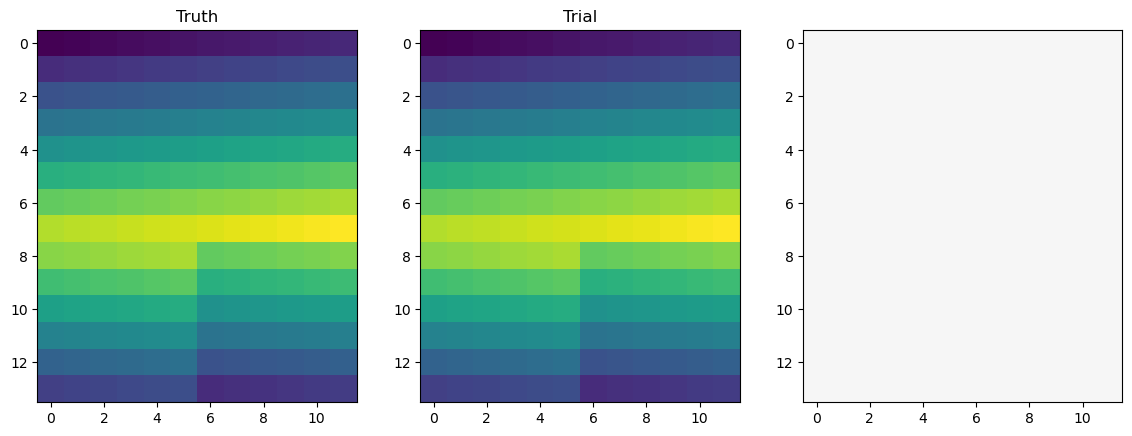

In [4]:
import numpy as np
synth1D = np.arange((ntheta * nphi))
doubling1D = np.zeros(((2 * ntheta - 2)* nphi))
import matplotlib.pyplot as plt
nphihalf = nphi // 2
npixplusnphihalf = (ntheta-2)*nphi + nphihalf

print(ntheta, nphi, 2*ntheta-2, )
for ringi in range(2 * ntheta-2):
    if (ringi < ntheta):
        for phii in range(nphi):
            doubling1D[ringi * nphi + phii] = synth1D[ringi * nphi + phii]
    elif (ringi >= ntheta):
        for phii in range(0, nphi):
            if phii<nphihalf:
                # bottom left
                doubling1D[ringi * nphi + phii] = synth1D[npixplusnphihalf - (ringi)*nphi + phii]
            else:
                # bottom right
                doubling1D[ringi * nphi + phii] = synth1D[npixplusnphihalf - (ringi+1)*nphi + phii]

fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(doubling1D_py)
ax[0].set_title('Truth')
ax[1].imshow(doubling1D.reshape(2*ntheta - 2, nphi))
ax[1].set_title("Trial")
ax[2].imshow(doubling1D_py-doubling1D.reshape(2*ntheta - 2, nphi), cmap="PiYG", vmin=-10, vmax=10)

(doubling1D_py) - (doubling1D.reshape(2*ntheta - 2, nphi))
# doubling1D.reshape(2*ntheta - 2, nphi)
doubling1D_py

## theta-contiguous array

12 8
[ 0 12 24 36 48 60 72 84  1 13 25 37 49 61 73 85  2 14 26 38 50 62 74 86
  3 15 27 39 51 63 75 87  4 16 28 40 52 64 76 88  5 17 29 41 53 65 77 89
  6 18 30 42 54 66 78 90  7 19 31 43 55 67 79 91  8 20 32 44 56 68 80 92
  9 21 33 45 57 69 81 93 10 22 34 46 58 70 82 94 11 23 35 47 59 71 83 95]

[ 0 12 24 36 48 60 72 84  0  0  0  0  0  0  1 13 25 37 49 61 73 85  0  0
  0  0  0  0  2 14 26 38 50 62 74 86  0  0  0  0  0  0  3 15 27 39 51 63
 75 87  0  0  0  0  0  0  4 16 28 40 52 64 76 88  0  0  0  0  0  0  5 17
 29 41 53 65 77 89  0  0  0  0  0  0  6 18 30 42 54 66 78 90 72 60 48 36
 24 12  7 19 31 43 55 67 79 91 73 61 49 37 25 13  8 20 32 44 56 68 80 92
 74 62 50 38 26 14  9 21 33 45 57 69 81 93 75 63 51 39 27 15 10 22 34 46
 58 70 82 94 76 64 52 40 28 16 11 23 35 47 59 71 83 95 77 65 53 41 29 17]
[ 0 12 24 36 48 60 72 84  0  0  0  0  0  0  1 13 25 37 49 61 73 85  0  0
  0  0  0  0  2 14 26 38 50 62 74 86  0  0  0  0  0  0  3 15 27 39 51 63
 75 87  0  0  0  0  0  0  4 16 28 40 52 64 

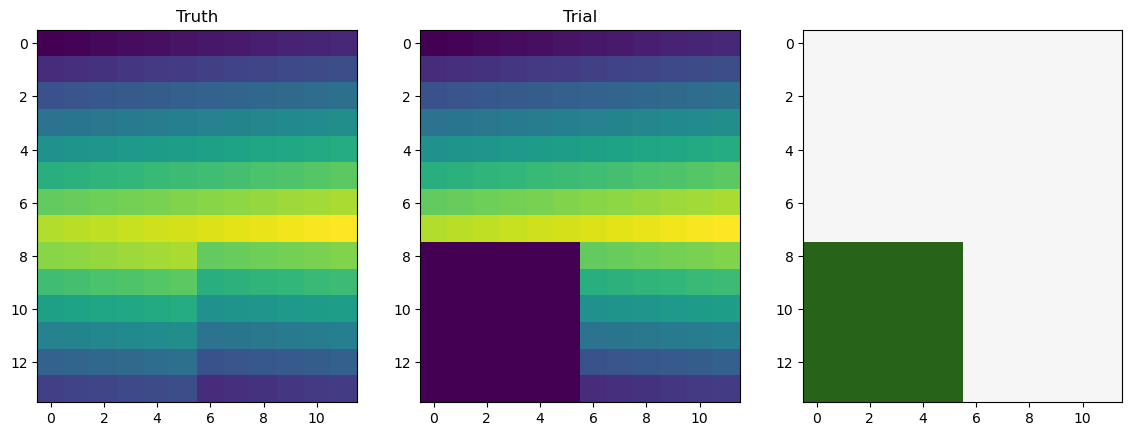

In [9]:
import numpy as np
synth1D = np.arange((ntheta * nphi)).reshape(ntheta, nphi).T.flatten()
print(nphi, ntheta)
print(synth1D)
print()
doubling1D = np.zeros(((2 * ntheta - 2)* nphi))
import matplotlib.pyplot as plt
nphihalf = nphi // 2
npix = ntheta * nphi
dtheta = 2 * ntheta-2

for phii in range(nphi):
    # print(phii)
    for ringi in range(2 * ntheta-2):
        if (ringi < ntheta):
            doubling1D[phii * (2*ntheta-2) + ringi] = synth1D[phii * ntheta + ringi]
        else:
            if phii<nphihalf: #bottom left
                widx = phii * (2*ntheta-2) + ringi
                # base = ntheta*(nphi//2)+ntheta + phii * ntheta - 2
                # add = (ntheta-ringi)
                # ridx = base + add
                # print("idx {} -> idx {}, synth1D[{}] = {}, base: {}, add: {}".format(widx, ridx,  ridx, synth1D[ridx], base, add))
                doubling1D[phii * (2*ntheta-2) + ringi] = synth1D[ntheta*(nphi//2)+ntheta + phii * ntheta - 2 + (ntheta-ringi)]
            else: # bottom right
                widx = phii * (2*ntheta-2) + ringi
                # base = (phii-nphihalf) * ntheta + ntheta - 2 + (ntheta-ringi)
                # add = (ntheta-ringi)
                # ridx = base + add
                # print("idx {} -> idx {}, synth1D[{}] = {}, base: {}, add: {}".format(widx, ridx,  ridx, synth1D[ridx], base, add))
                doubling1D[widx] = synth1D[(phii-nphihalf) * ntheta + ntheta - 2 + (ntheta-ringi)]
    # print(s)
print(doubling1D.flatten().astype(int))
fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(doubling1D_py)
ax[0].set_title('Truth')
ax[1].imshow(doubling1D.reshape(nphi, 2*ntheta - 2).T)
ax[1].set_title("Trial")
ax[2].imshow(doubling1D_py-doubling1D.reshape(nphi, 2*ntheta - 2).T, cmap="PiYG", vmin=-10, vmax=10)

# (doubling1D_py) - (doubling1D.reshape(nphi, 2*ntheta - 2).T)
# doubling1D.reshape(2*ntheta - 2, nphi)
# print(doubling1D_py.T.flatten().astype(int))
print(doubling1D.flatten().astype(int))
# print(synth1D.flatten())

# integration spin1 - pointing

In [96]:
import cupy as cp
import numpy as np
import shtns
import matplotlib.pyplot as plt
from cunusht.c.podo_interface import Cpointing_ptrs, Cpointing_cparr, Cpointing_1Dto1D
from ducc0.misc import get_deflected_angles

import cunusht
import healpy as hp

input_value = None
def input_values(lmax, geom):
    npix = int(lmax+1)*2*(lmax+1)
    # thetas = cp.linspace(0, np.pi, lmax+1, dtype=cp.float64)+0.0122479
    thetas = cp.array(geom.theta.astype(cp.float64))
    # phi0 = cp.zeros(lmax+1, dtype=cp.float64)
    phi0 = cp.array(geom.phi0.astype(cp.float64))
    # ringstarts = cp.linspace(0, npix-npix//(lmax+1), lmax+1, dtype=np.uint64)
    ringstarts = cp.array(geom.ofs.astype(cp.uint64))
    # nphis = cp.array([npix/lmax for a in np.arange(lmax+1)], dtype=np.uint64)
    nphis = cp.array(geom.nph.astype(cp.uint64))
    del lmax, npix, geom
    return locals()

def spin1_ducc(alm_random, test_case):
    s1tp = t.synthesis(alm_random, spin=1, lmax=test_case, mmax=test_case, nthreads=10, mode='GRAD_ONLY')
    print("shape of s1tp: ", s1tp.shape)  
    return s1tp
    
def spin1_shtns(cGPU, test_case):
    ll = np.arange(0, test_case+1)
    scaled = hp.almxfl(alm_random, np.nan_to_num(np.sqrt(1/(ll*(ll+1)))))
    alm = cp.array(scaled)

    print("shape of alm: ", alm.shape)

    out_spin1theta = cp.empty(shape=(cGPU.nphi,cGPU.nlat), dtype=cp.float64)
    out_spin1phi = cp.empty(shape=(cGPU.nphi,cGPU.nlat), dtype=cp.float64)
    cGPU.cu_SHsph_to_spat(alm.data.ptr, out_spin1theta.data.ptr, out_spin1phi.data.ptr)
    return out_spin1theta, out_spin1phi

test_cases = [ 
              lmax for lmax in [2**n-1 for n in np.arange(8, 9)]
              ]
for test_case in test_cases:
    t = cunusht.get_transformer('ducc', 'SHT', 'CPU')
    geominfo = ('gl',{'lmax': test_case})
    t = t(geominfo)
    input_value = input_values(test_case, t.geom)
    
    cGPU = shtns.sht(int(test_case), int(test_case))
    cGPU.set_grid(
        flags=shtns.SHT_ALLOW_GPU + shtns.SHT_THETA_CONTIGUOUS,
        nlat=int(test_case+1), nphi=int(2*(test_case+1)))
    
    alm_random = np.random.randn(cGPU.nlm)*1e-6 + 1j*np.random.randn(cGPU.nlm)*1e-6
    
    s1tp = spin1_ducc(alm_random, test_case)
    out_spin1theta, out_spin1phi = spin1_shtns(cGPU, test_case)

[SHTns 3.6.6] built Apr  8 2024, 07:59:49, id: v3.6.6-10-g3986338*,avx512,ishioka,openmp,cuda
[SHTns 3.6.6] built Apr  8 2024, 07:59:49, id: v3.6.6-10-g3986338*,avx512,ishioka,openmp,cuda
        Lmax=255, Mmax*Mres=255, Mres=1, Nlm=32896  [10 threads, orthonormalized]
        > Condon-Shortley phase = 1, normalization = 0
        => using FFTW : Mmax=255, Nphi=512, Nlat=256, Nbatch=1  (theta-contiguous layout: phi_inc=256, theta_inc=1)
          fftw cost ifftc=516530,  fftc=516530
          Memory used for Ylm and Zlm matrices = 96.375 Mb x2
        => using Gauss nodes
          Sum of weights = 2 + -2.22045e-16 (should be 2)
          Applying quadrature rule to 3/2.x^2 = 1 + -1.22125e-15 (should be 1)
          Applying quadrature rule to 3/4.sin2(theta) = 1 + -5.55112e-17 (should be 1)
 NLAT=256, NLAT_2=128
          max zero at Gauss nodes for Pl[l=NLAT] : 1.9423e-13
        + polar optimization threshold = 1.0e-10
          tm[im]= 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 

/tmp/ipykernel_2331178/728992806.py:32: RuntimeWarning: divide by zero encountered in divide
  scaled = hp.almxfl(alm_random, np.nan_to_num(np.sqrt(1/(ll*(ll+1)))))


In [101]:
alm_random = cp.array(np.random.randn(cGPU.nlm)*1e-6 + 1j*np.random.randn(cGPU.nlm)*1e-6)
cGPU.cu_spat_to_SH(alm_random.data.ptr, out_spin1theta.data.ptr)

In [2]:
print(t.geom.ofs[:2], input_value['ringstarts'].get()[:2], t.geom.ofs.size, input_value['ringstarts'].get().size)
print(t.geom.theta[-2:], input_value['thetas'].get()[-2:], t.geom.theta.size, input_value['thetas'].get().size)
print(t.geom.theta[:2], input_value['thetas'].get()[:2], t.geom.theta.size, input_value['thetas'].get().size)
print(input_value['phi0'].get().shape, t.geom.phi0.shape)
print(out_spin1theta.get().mean(), s1tp[0,:].mean())

[  0 512] [  0 512] 256 256
[3.12007189 3.13221712] [3.12007189 3.13221712] 256 256
[0.00937553 0.02152076] [0.00937553 0.02152076] 256 256
(256,) (256,)
-9.54704021525075e-07 -9.5470402152525e-07


In [3]:
print("shape of out_spin1theta: ", out_spin1theta.shape)
print("shape of out_spin1phi: ", out_spin1phi.shape)

shape of out_spin1theta:  (512, 256)
shape of out_spin1phi:  (512, 256)


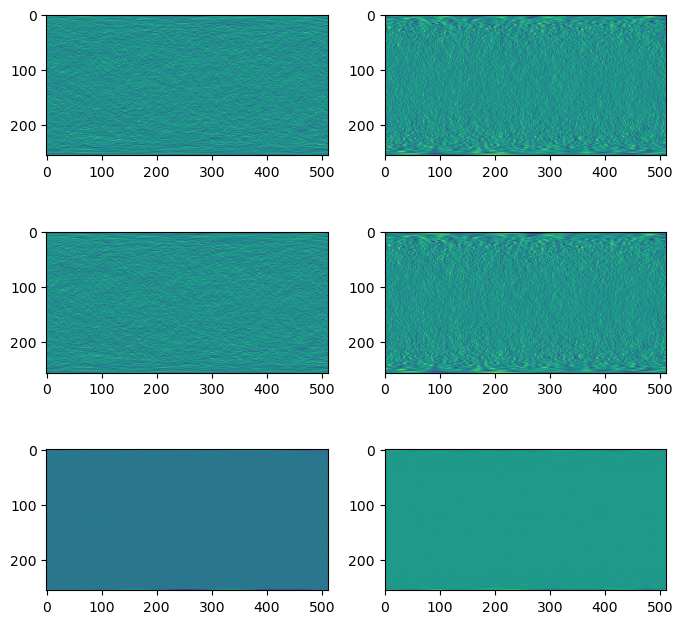

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(8,8))

ax[0,0].imshow(s1tp[0,:].reshape(t.geom.ofs.size,-1))#, vmin=-1e-12, vmax=1e-12)
ax[0,1].imshow(s1tp[1,:].reshape(t.geom.ofs.size,-1))#, vmin=-1e-12, vmax=1e-12)

ax[1,0].imshow(out_spin1theta.get().T)#, vmin=-1e-7, vmax=1e-7)
ax[1,1].imshow(out_spin1phi.get().T),# vmin=-1e-8, vmax=1e-8)

ax[2,0].imshow(out_spin1theta.get().T-s1tp[0,:].reshape(t.geom.ofs.size,-1))#, vmin=-1e-12, vmax=1e-12)
ax[2,1].imshow(out_spin1phi.get().T-s1tp[1,:].reshape(t.geom.ofs.size,-1))#, vmin=-1e-12, vmax=1e-12)

In [5]:
input_value = input_values(test_case, t.geom)
out_pointingtheta = cp.zeros(t.geom.npix(), dtype=cp.float64)
out_pointingphi = cp.zeros(t.geom.npix(), dtype=cp.float64)
# Cpointing_1Dto1D(**input_value, spin1_theta=out_spin1theta.flatten(), spin1_phi=out_spin1phi.flatten(), out_ptheta=out_pointingtheta, out_pphi=out_pointingphi)
Cpointing_1Dto1D(**input_value, spin1_theta=cp.array(s1tp[0].flatten()), spin1_phi=cp.array(s1tp[1].T.flatten()), out_ptheta=out_pointingtheta, out_pphi=out_pointingphi)

# def2d = np.array([out_spin1theta.get()[0].T.flatten(), out_spin1phi.get()[0].T.flatten()])
def2d = s1tp.T
tht_phip_gamma = get_deflected_angles(
    theta=t.geom.theta,
    phi0=t.geom.phi0,
    nphi=t.geom.nph,
    ringstart=t.geom.ofs,
    deflect=def2d,
    calc_rotation=False,
    nthreads=10)

In [6]:
from cunusht.geometry import Geom

def _sind_d_m1(d, deriv=False):
    assert np.max(d) <= 0.01, (np.max(d), 'CMB Lensing deflections should never be that big')
    d2 = d * d
    if not deriv:
        return np.poly1d([0., -1 / 6., 1. / 120., -1. / 5040.][::-1])(d2)
    else:
        return - 1. / 3. * (1. - d2 / 10. * (1. - d2 / 28.))

def d2ang(red, imd, tht, phi, version, sint_dphi=False):
    assert version in [1, 0, -1], version
    d = np.sqrt(red ** 2 + imd ** 2)
    if np.max(d) > 0.01:
        #print(np.max(d), np.max(np.abs(red)), np.max(np.abs(imd)), 'CMB Lensing deflections should never be that big')
        from scipy.special import j0
        sind_d = j0(d)
    else:
        sind_d = 1. + _sind_d_m1(d)  # sin(d) / d avoiding division by zero or near zero, assuming small deflections

    if version == 0:  #---'close' to equator, where cost ~ 0
        cost = np.cos(tht)
        assert np.max(cost < 0.8), ('wrong localization', np.max(cost))
        costp = cost * np.cos(d) - red * sind_d * np.sqrt(1. - cost ** 2) # -- cosd fine here
        dphi = np.arcsin(imd / np.sqrt(1. - costp ** 2) * sind_d) # This is unanbiguous unless d is absurdly high
        thtp = np.arccos(costp)
    else:
        isnorth = version == 1
        sint = np.sin(tht)
        # --- 'e_t' quantities are 1 \mp cos(t) with - if close to 0 and + if close to pi, such that e_t is small and > 0
        e_t = 2 * np.sin(tht * 0.5) ** 2 if isnorth else 2 * np.cos(tht * 0.5) ** 2  # 1 -+ costh with no precision loss
        e_d = 2 * np.sin(d * 0.5) ** 2

        # -- Eq. for new co-latitude (always work fine), here written for 1 - cos tht in order not to lose precision
        e_tp = e_t + e_d - e_t * e_d + version * red * sind_d * sint  # 1 -+ cost'
        sintp = np.sqrt(np.maximum(0., e_tp * (2 - e_tp)))
        if isnorth:
            assert np.max(tht) < np.pi * 0.4, ('wrong localization', np.max(tht))  # -- for the arcsin at the end
            thtp = np.arcsin(sintp)
            dphi = np.arctan2(imd * sind_d, (1. - e_d) * sint + red * sind_d * (1. - e_t))
        else:
            assert np.min(tht) > np.pi * 0.4, ('wrong localization', np.min(tht))  # -- for the arcsin at the end
            thtp = np.pi - np.arcsin(sintp)
            dphi = np.arctan2(imd * sind_d, (1. - e_d) * sint + red * sind_d * (e_t - 1.))
    if sint_dphi:
        if version == 0: # should be calculated already
            sint = np.sqrt(1. - cost * cost)
        return thtp - tht, sint * dphi
    return thtp, (phi +dphi) % (2. * np.pi)
    
def pointing_py(self, d1):
    npix = self.geom.npix()
    thp_phip_gamma = np.empty((3, npix), dtype=float)  # (-1) gamma in last arguement
    startpix = 0
    assert np.all(self.geom.theta > 0.) and np.all(self.geom.theta < np.pi), 'fix this (cotangent below)'
    red, imd = d1
    for ir in np.argsort(self.geom.ofs): # We must follow the ordering of scarf position-space map
        pixs = Geom.rings2pix(self.geom, [ir])
        if pixs.size > 0:
            t_red = red[pixs]
            i_imd = imd[pixs]
            phis = Geom.phis(self.geom, ir)[pixs - self.geom.ofs[ir]]
            assert phis.size == pixs.size, (phis.size, pixs.size)
            thts = self.geom.theta[ir] * np.ones(pixs.size)
            thtp_, phip_ = d2ang(t_red, i_imd, thts , phis, int(np.round(np.cos(self.geom.theta[ir]))))
            sli = slice(startpix, startpix + len(pixs))
            thp_phip_gamma[0, sli] = thtp_
            thp_phip_gamma[1, sli] = phip_
            cot = np.cos(self.geom.theta[ir]) / np.sin(self.geom.theta[ir])
            d = np.sqrt(t_red ** 2 + i_imd ** 2)
            thp_phip_gamma[2, sli] = np.arctan2(i_imd, t_red ) - np.arctan2(i_imd, d * np.sin(d) * cot + t_red * np.cos(d))
            startpix += len(pixs)
    print(thp_phip_gamma.T[:, 0:2].shape)
    assert startpix == npix, (startpix, npix)
    return thp_phip_gamma.T[:, 0:2]

tpg_pointing = pointing_py(t, s1tp)

(131072, 2)


In [7]:
print("Shape of out_pointingtheta: ", out_pointingtheta.shape)
print("Shape of out_pointingphi: ", out_pointingphi.shape)
print("Shape nlat, nphi: ", cGPU.nlat, cGPU.nphi)
print("Shape of tht_phip_gamma: ", tht_phip_gamma.shape)
print("Shape of tpg_pointing: ", tpg_pointing.shape)

Shape of out_pointingtheta:  (131072,)
Shape of out_pointingphi:  (131072,)
Shape nlat, nphi:  256 512
Shape of tht_phip_gamma:  (131072, 2)
Shape of tpg_pointing:  (131072, 2)


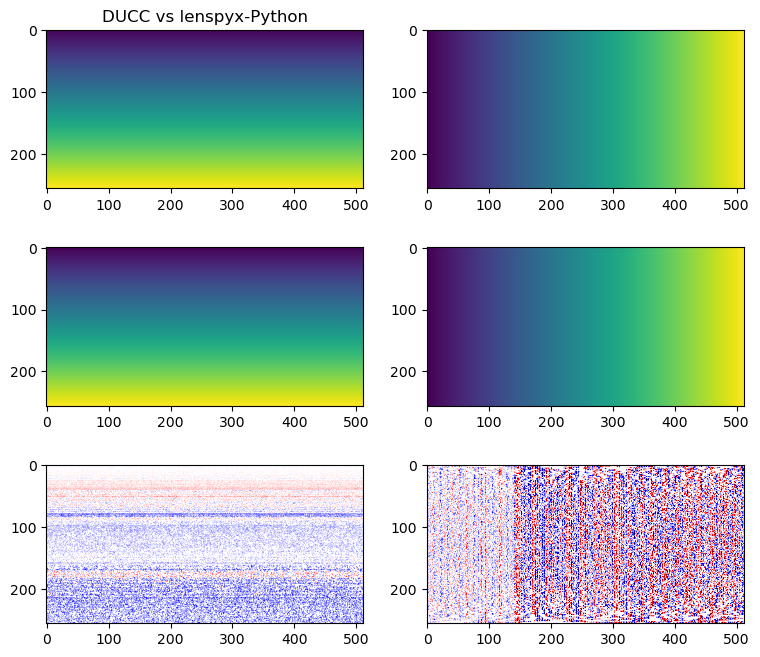

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,2, figsize=(9,8))
ax[0,0].set_title("DUCC vs lenspyx-Python")
ax[0,0].imshow(tht_phip_gamma[:,0].reshape(len(t.geom.theta),-1), vmin=0, vmax=np.pi)
ax[0,1].imshow(tht_phip_gamma[:,1].reshape(len(t.geom.theta),-1), vmin=0, vmax=2*np.pi)

ax[1,0].imshow(tpg_pointing[:,0].reshape(len(t.geom.theta),-1), vmin=0, vmax=np.pi)
ax[1,1].imshow(tpg_pointing[:,1].reshape(len(t.geom.theta),-1), vmin=0, vmax=2*np.pi)

ax[2,0].imshow((tpg_pointing[:,0] - tht_phip_gamma[:,0]).reshape(len(t.geom.theta),-1), vmin=-1e-15, vmax=1e-15, cmap='seismic')
ax[2,1].imshow((tpg_pointing[:,1] - tht_phip_gamma[:,1]).reshape(len(t.geom.theta),-1), vmin=-1e-15, vmax=1e-15, cmap='seismic')

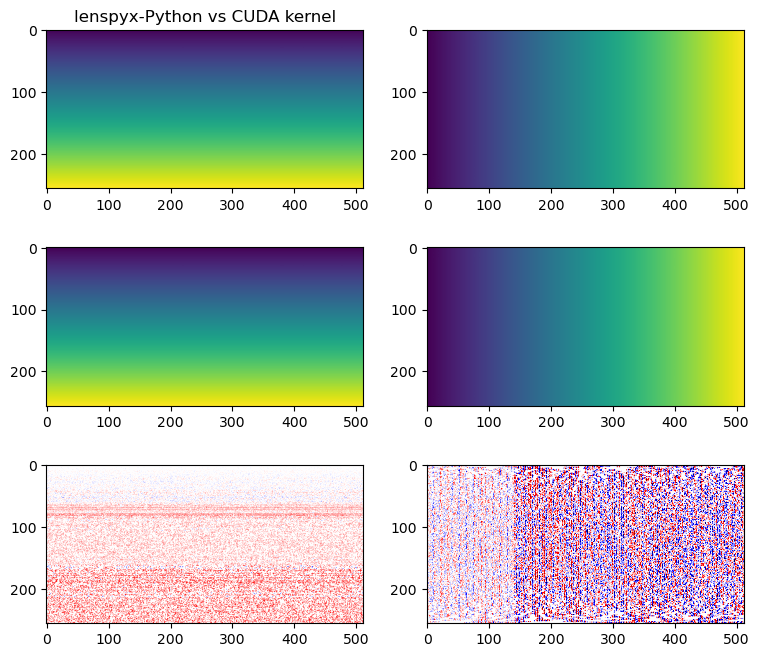

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,2, figsize=(9,8))
ax[0,0].set_title("lenspyx-Python vs CUDA kernel")
ax[0,0].imshow(tpg_pointing[:,0].reshape(len(t.geom.theta),-1), vmin=0, vmax=np.pi)
ax[0,1].imshow(tpg_pointing[:,1].reshape(len(t.geom.theta),-1), vmin=0, vmax=2*np.pi)

ax[1,0].imshow(out_pointingtheta.get().reshape(len(t.geom.theta),-1), vmin=0, vmax=np.pi)
ax[1,1].imshow(out_pointingphi.get().reshape(len(t.geom.theta),-1), vmin=0, vmax=2*np.pi)
# out_pointingphi.get()-tht_phip_gamma[:,1]
ax[2,0].imshow((tht_phip_gamma[:,0] - out_pointingtheta.get()).reshape(len(t.geom.theta),-1), vmin=-1e-15, vmax=1e-15, cmap='seismic')
ax[2,1].imshow((tht_phip_gamma[:,1] - out_pointingphi.get()).reshape(len(t.geom.theta),-1), vmin=-1e-15, vmax=1e-15, cmap='seismic')

In [76]:
np.allclose(tpg_pointing[:,0], b=out_pointingtheta.get(), atol=1e-3), np.allclose(tpg_pointing[:100,1], b=out_pointingphi.get()[:100], atol=1e-16, rtol=1e-20)

ModuleNotFoundError: No module named 'unittest.TestCase'

In [50]:
(tpg_pointing[:,1] - out_pointingphi.get()).std()

0.19548627110817443

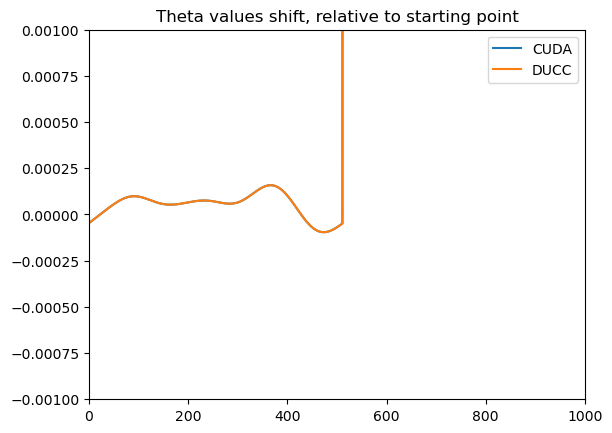

(0.0, 1000.0)

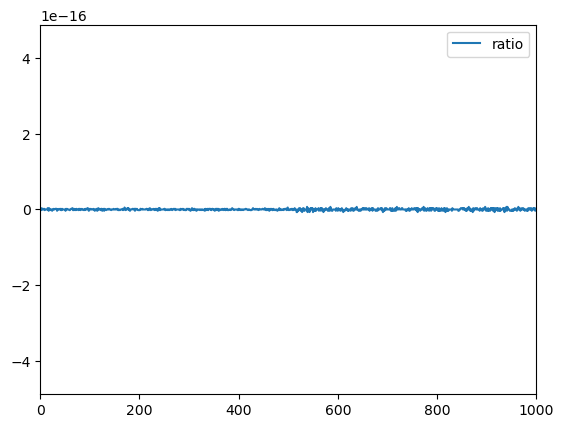

In [37]:
_lmax = 512
plt.title('Theta values shift, relative to starting point')
plt.plot(out_pointingtheta.get()[:_lmax+1]-t.geom.theta[0]*np.ones(_lmax+1), label='CUDA')
plt.plot(tht_phip_gamma[:_lmax+1,0]-t.geom.theta[0]*np.ones(_lmax+1), label='DUCC')
plt.legend()
plt.xlim(0,1000)
plt.ylim(-0.001,0.001)
plt.show()
plt.plot(out_pointingtheta.get()-tht_phip_gamma[:,0], label='ratio')
plt.legend()
plt.xlim(0,1000)

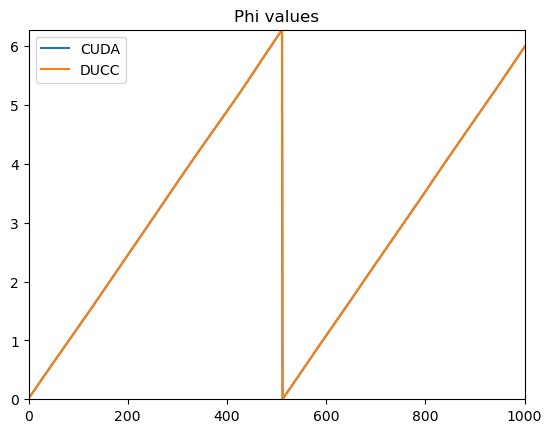

(-1e-15, 1e-15)

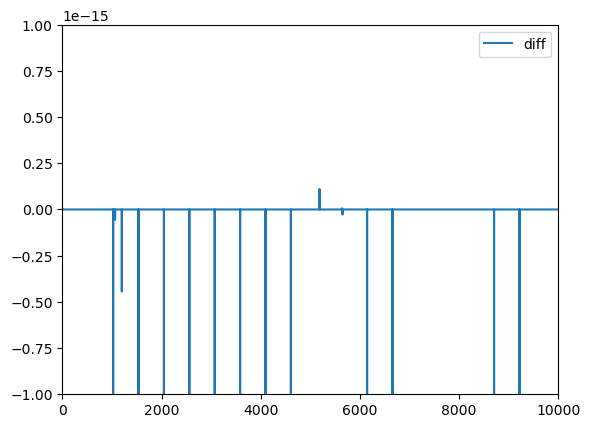

In [36]:
plt.title('Phi values')
plt.plot(out_pointingphi.get(), label='CUDA')
plt.plot(tht_phip_gamma[:,1], label='DUCC')
plt.legend()
plt.xlim(0,1000)
plt.ylim(0,2*np.pi)

plt.show()
plt.plot(out_pointingphi.get()-tht_phip_gamma[:,1], label='diff')
plt.legend()
plt.xlim(0,10000)
plt.ylim(-1e-15,1e-15)

In [ ]:
_pixmax = 512*2
plt.plot(out_pointingphi.get()[:_pixmax+1]-(np.arange(0,_pixmax+1)*2*np.pi)/_pixmax, label='out_pointingphi')
plt.plot(tht_phip_gamma[:_pixmax+1,1]-(np.arange(0,_pixmax+1)*2*np.pi)/_pixmax, label='tht_phip_gamma')
plt.plot(tpg_pointing[:_pixmax+1,1]-(np.arange(0,_pixmax+1)*2*np.pi)/_pixmax, label='tpg_pointing')
plt.legend()
# plt.plot(tht_phip_gamma[:,1])
# plt.plot(out_pointingphi.get()-tht_phip_gamma[:,1])
plt.xlim(0,_pixmax)
plt.ylim(-0.01,0.01)
# plt.ylim(4.71,4.72)

# adjoint doubling

In [1]:
import numpy as np
import ducc0
lmax = 5
ntheta = (ducc0.fft.good_size(lmax + 2) + 3) // 4 * 4
nphi = ducc0.fft.good_size(lmax + 1) * 2
synth1D = np.arange((ntheta * nphi)).reshape(nphi,-1).T.flatten()
doubling1D_py = np.zeros((2 * ntheta-2, nphi))
synth1D_py = np.copy(synth1D.reshape(ntheta, nphi))

nphihalf = nphi//2
doubling1D_py[:ntheta, :] = synth1D_py
doubling1D_py[ntheta:, :nphihalf] = doubling1D_py[ntheta-2:0:-1, nphihalf:]
doubling1D_py[ntheta:, nphihalf:] = doubling1D_py[ntheta-2:0:-1, :nphihalf]

# doubling1D_py

In [2]:
d1D_py = np.copy(doubling1D_py)
d1D_py[1:ntheta - 1, :nphihalf] += d1D_py[-1:ntheta - 1:-1, nphihalf:]#d1D_py[-1:ntheta - 1:-1, nphihalf:]
d1D_py[1:ntheta - 1, nphihalf:] += d1D_py[-1:ntheta - 1:-1, :nphihalf]#d1D_py[-1:ntheta - 1:-1, :nphihalf]
d1D_py = d1D_py[:ntheta, :]
map_und = np.empty((1, ntheta, nphi))
map_und[0] = d1D_py.real
print(map_und.size, synth1D.shape)


96 (96,)


Text(0.5, 1.0, 'map')

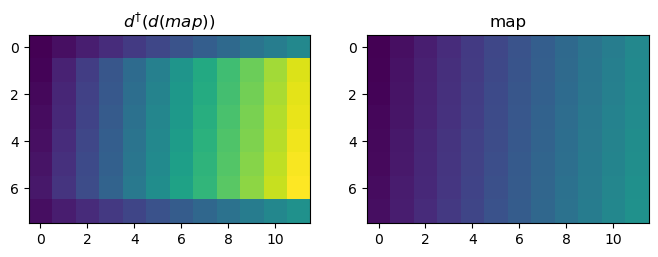

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(map_und[0], vmin=np.min(synth1D), vmax=np.max(map_und[0]))
ax[0].set_title(r"$d^{\dagger}\left(d(map)\right)$")
ax[1].imshow(synth1D_py, vmin=np.min(synth1D), vmax=np.max(map_und[0]))
ax[1].set_title(r"map")

ntheta,  8 nphi:  12 nphihalf:  6 npix:  96 npixplusnphihalf:  150
shape doubling1D  (168,) shape synth1D_cu  (96,)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

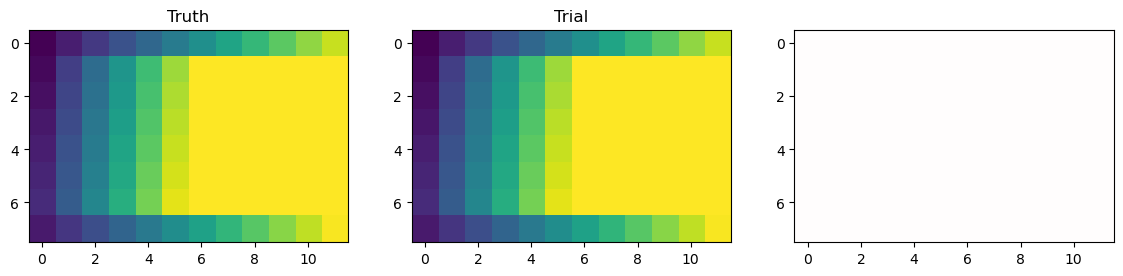

In [95]:
import numpy as np
import matplotlib.pyplot as plt
synth1D_cu = np.arange((ntheta * nphi))
synth1D_cu[:] = doubling1D_py.flatten()[:ntheta*nphi]
doubling1D = np.copy(doubling1D_py.flatten())

nphihalf = nphi // 2
npix = ntheta * nphi
npixplusnphihalf = 2*(ntheta-2)*nphi + nphihalf
for ringi in range(1,ntheta-1):
    doubleringi = (ntheta-1 + (ringi))%ntheta
    for phii in range(0, nphi):
        if phii<nphihalf:
            synth1D_cu[ringi * nphi + phii] += doubling1D[npixplusnphihalf - (doubleringi-1)*nphi + phii]
        else:
            synth1D_cu[ringi * nphi + phii] += doubling1D[npixplusnphihalf - (doubleringi)*nphi + phii]

fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(map_und[0], vmin=0, vmax=npix)
ax[0].set_title('Truth')
ax[1].imshow(synth1D_cu.reshape(ntheta, nphi), vmin=0, vmax=npix)
ax[1].set_title("Trial")
ax[2].imshow(map_und[0]-synth1D_cu.reshape(ntheta, nphi), cmap="seismic", vmin=-10, vmax=10)

((map_und[0]) - (synth1D_cu.reshape(ntheta, nphi))).astype(int)